In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


/Users/bessie/learn-python/env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'])

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [5]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [6]:
df = df.rename(columns={'Date':'ds', 'Temp':'y'})


In [7]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)


In [8]:
m.fit(df)

19:31:40 - cmdstanpy - INFO - Chain [1] start processing
19:31:41 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# 生成未来 30 天的时间表并预测
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,18.920404,11.669030,18.753765,18.920404,18.920404,-3.750214,-3.750214,-3.750214,-7.078677,...,0.010980,0.010980,0.010980,3.317482,3.317482,3.317482,0.0,0.0,0.0,15.170190
1,1981-01-02,18.918598,11.545122,18.538604,18.918598,18.918598,-3.703197,-3.703197,-3.703197,-7.078677,...,-0.019828,-0.019828,-0.019828,3.395308,3.395308,3.395308,0.0,0.0,0.0,15.215401
2,1981-01-03,18.916791,11.660382,18.762781,18.916791,18.916791,-3.666164,-3.666164,-3.666164,-7.078677,...,-0.060138,-0.060138,-0.060138,3.472650,3.472650,3.472650,0.0,0.0,0.0,15.250627
3,1981-01-04,18.914985,11.830920,18.815930,18.914985,18.914985,-3.683511,-3.683511,-3.683511,-7.078677,...,-0.153096,-0.153096,-0.153096,3.548262,3.548262,3.548262,0.0,0.0,0.0,15.231474
4,1981-01-05,18.913179,11.960173,19.170459,18.913179,18.913179,-3.477480,-3.477480,-3.477480,-7.078677,...,-0.019722,-0.019722,-0.019722,3.620919,3.620919,3.620919,0.0,0.0,0.0,15.435699


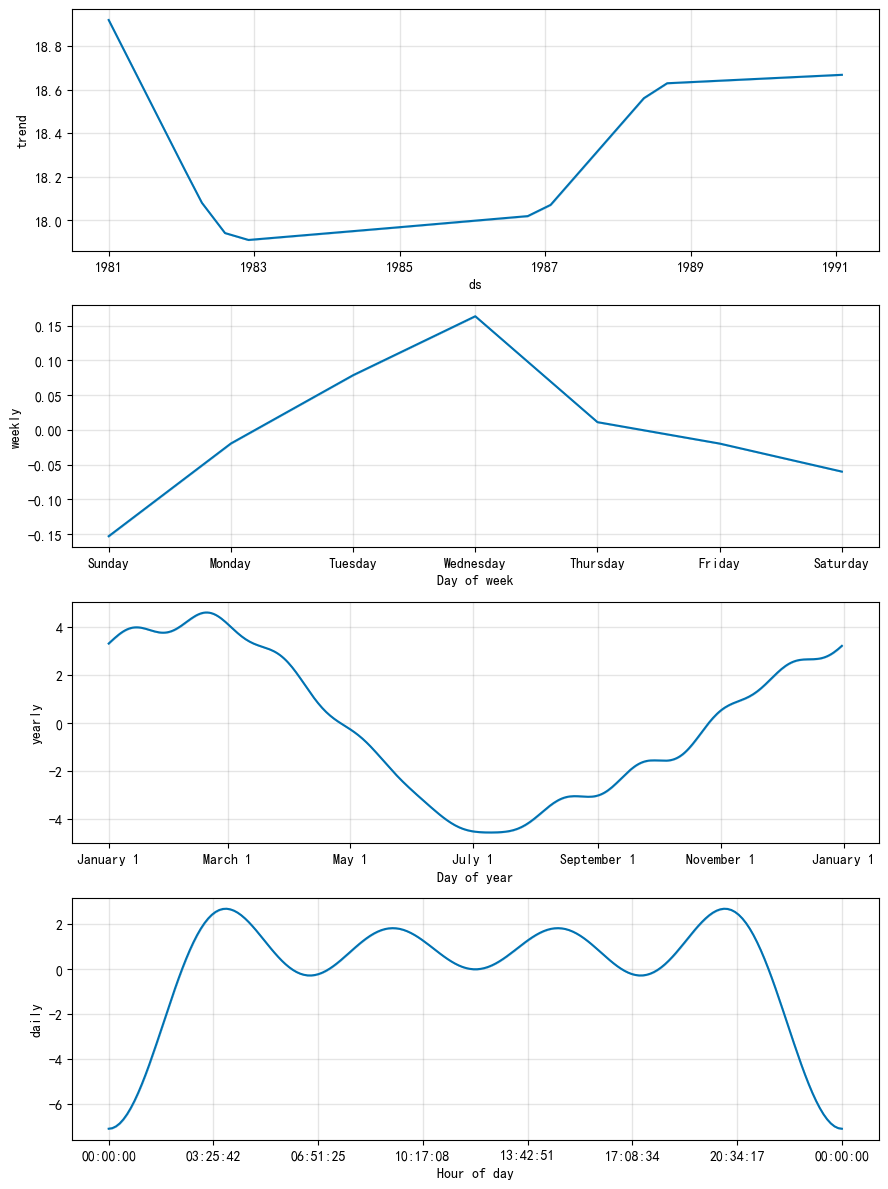

In [10]:
# 绘制所有季节性成分
fig = m.plot_components(forecast)
plt.show()

你可以先都打开 (yearly=True, weekly=True)，然后用 m.plot_components(forecast) 看 Prophet 自动拟合出的季节成分曲线。如果某个成分几乎是平的，说明它对数据没贡献，可以关掉以简化模型、提速。
- trend: 如果你的业务指标有长期拐点或波动，就体现在这里；基于这个趋势，你可以判断模型是否捕捉到真实的上升／下降周期。
- weekly: 如果这条曲线是平的（接近 0 线），说明一周内无明显波动，可关掉 weekly_seasonality；反之就保留。
- yearly: 清晰的年季节性表明务必保留 yearly_seasonality；如果你的指标在每年特定时段有高低峰（例如促销季、电费用量、病假高峰等），年周期成分能帮你建模。


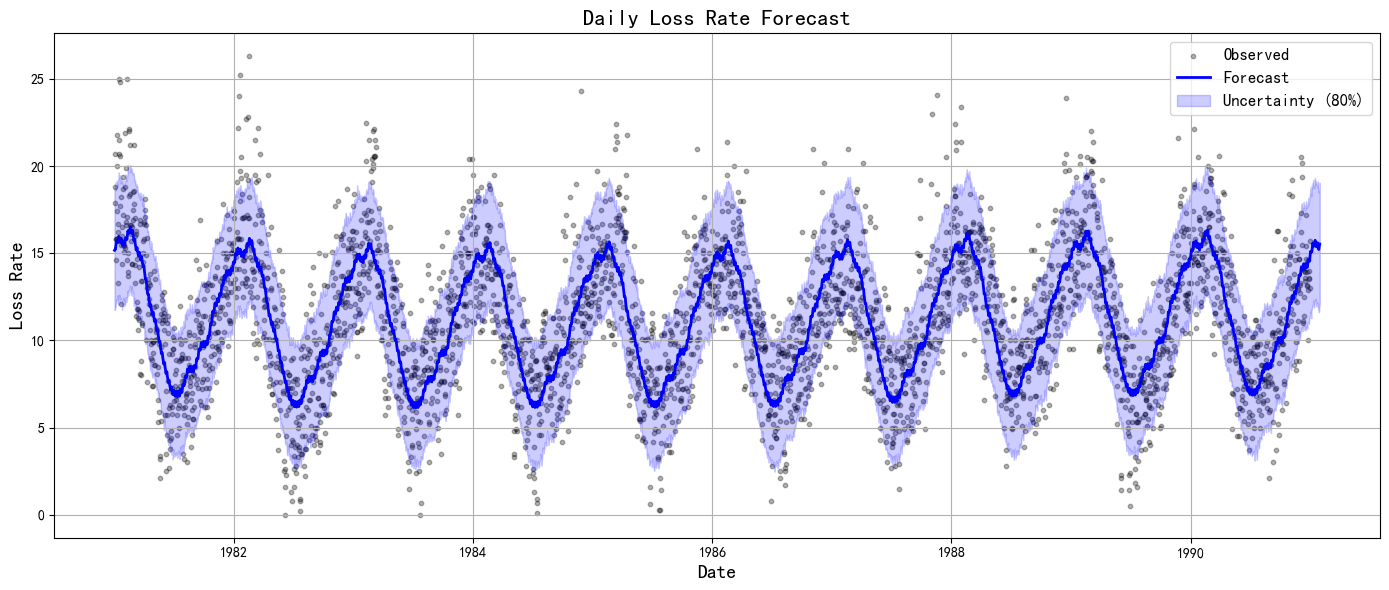

In [13]:
# 3. 自定义绘图
fig, ax = plt.subplots(figsize=(14, 6))

# 历史观测
ax.scatter(df['ds'], df['y'],
           s=10,            # 点大小
           alpha=0.3,       # 透明度
           color='black', 
           label='Observed')

# 预测值
ax.plot(forecast['ds'], forecast['yhat'],
        color='blue', linewidth=2, label='Forecast')

# 置信区间
ax.fill_between(forecast['ds'],
                forecast['yhat_lower'],
                forecast['yhat_upper'],
                color='blue', alpha=0.2,
                label='Uncertainty (80%)')

# 美化
ax.set_title('Daily Loss Rate Forecast', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Loss Rate', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# 2. 拟合并预测
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)


23:49:02 - cmdstanpy - INFO - Chain [1] start processing
23:49:02 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# 3. 分段
last_date = df['ds'].max()
hist_forecast = forecast[forecast['ds'] <= last_date]
future_forecast = forecast[forecast['ds'] > last_date]

在 Notebook 里直接敲入

```bash
pip install nbformat
```

和在一个代码单元里写

```python
!pip install nbformat
```

其实都调用了你系统（或虚拟环境）里的 `pip` 来安装包，但有几点值得注意：

1. **运行环境可能不一致**

   * 如果你有多个 Python 解释器（比如全局 Python、conda env、venv），在终端里 `pip install` 会作用于你当前 shell 的环境；
   * 而 `!pip install` 会调用 Notebook 内核所在的那个 Python环境里的 `pip`，通常是你启动 Jupyter 时那个环境。

2. **魔法命令 `%pip` 更可靠**
   Jupyter 从 IPython 7.16 开始引入了专门的魔法命令

   ```python
   %pip install nbformat
   ```

   它能保证把包装到当前内核的环境里（而不是意外地装到系统另一个 Python），也是官方推荐的做法。

3. **输出和行为**

   * `!pip install ...` 默认是个普通 shell 命令，输出会打印到 cell 的 stdout，但不会返回 Python 对象；
   * `%pip install ...` 是 IPython 的一等魔法命令，能更好地处理依赖冲突提示，也更明确地作用于当前内核。

---

**建议**：在 Notebook 里用

```python
%pip install nbformat
```

这样最安全、最清晰。


In [18]:
# 4. 绘制交互式图
fig = go.Figure()

#  历史观测
fig.add_trace(go.Scatter(
    x=df['ds'], y=df['y'],
    mode='markers', marker=dict(color='grey', size=6, opacity=0.4),
    name='Observed'
))

# 历史拟合
fig.add_trace(go.Scatter(
    x=hist_forecast['ds'], y=hist_forecast['yhat'],
    mode='lines', line=dict(color='blue'), name='Fit'
))

# 未来预测
fig.add_trace(go.Scatter(
    x=future_forecast['ds'], y=future_forecast['yhat'],
    mode='lines', line=dict(color='red', dash='dash'), name='Forecast'
))

# 置信区间 (fill between)
fig.add_trace(go.Scatter(
    x=pd.concat([future_forecast['ds'], future_forecast['ds'][::-1]]),
    y=pd.concat([future_forecast['yhat_upper'], future_forecast['yhat_lower'][::-1]]),
    fill='toself', fillcolor='rgba(255,0,0,0.2)', line=dict(color='rgba(255,0,0,0)'),
    hoverinfo="skip", showlegend=True, name='Uncertainty (80%)'
))

fig.update_layout(
    title='Daily Temp Forecast (Interactive)',
    xaxis_title='Date',
    yaxis_title='Temp',
    template='plotly_white'
)

fig.show()

%pip install nbformat


In [20]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=0)  # 仅预测历史，periods=0
forecast = m.predict(future)

# 3. 合并历史预测与观测，计算残差与异常标记
res = df.merge(forecast[['ds','yhat','yhat_lower','yhat_upper']], on='ds', how='left')
res['residual'] = res['y'] - res['yhat']
res['anomaly']  = (res['y'] > res['yhat_upper']) | (res['y'] < res['yhat_lower'])


23:52:08 - cmdstanpy - INFO - Chain [1] start processing
23:52:08 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# 假设已有 res DataFrame
last_date = res['ds'].max()
start_last_week = last_date - pd.Timedelta(days=6)

# 取出最后七天的数据
last_week = res[res['ds'] >= start_last_week]

# 从中筛出异常点
last_week_anomalies = last_week[last_week['anomaly']]

# 查看结果
print("最后七天所有记录：")
print(last_week[['ds','y','yhat_lower','yhat_upper','residual','anomaly']])
print("\n最后七天异常记录：")
print(last_week_anomalies[['ds','y','yhat_lower','yhat_upper','residual']])

最后七天所有记录：
             ds     y  yhat_lower  yhat_upper  residual  anomaly
3643 1990-12-25  12.9   11.146562   18.083147 -1.590773    False
3644 1990-12-26  14.6   11.217963   18.032702 -0.023488    False
3645 1990-12-27  14.0   10.871234   17.974343 -0.525359    False
3646 1990-12-28  13.6   11.069714   17.982255 -0.954725    False
3647 1990-12-29  13.5   11.274011   17.922687 -1.079894    False
3648 1990-12-30  15.7   11.089829   17.771713  1.143080    False
3649 1990-12-31  13.0   11.356338   18.213606 -1.763860    False

最后七天异常记录：
Empty DataFrame
Columns: [ds, y, yhat_lower, yhat_upper, residual]
Index: []


In [22]:
# 1. Generate synthetic dataset
np.random.seed(42)
date_range = pd.date_range(start='2021-01-01', end='2023-06-01', freq='D')
n = len(date_range)
trend = 0.0005 * np.arange(n)  # linear trend
seasonal_yearly = 0.1 * np.sin(2 * np.pi * np.arange(n) / 365.25)
seasonal_weekly = 0.02 * np.sin(2 * np.pi * np.arange(n) / 7)
noise = 0.02 * np.random.randn(n)

In [23]:
y = 0.05 + trend + seasonal_yearly + seasonal_weekly + noise
df = pd.DataFrame({'ds': date_range, 'y': y})

In [24]:
df.head()

,ds,y
0,2021-01-01,0.059934
1,2021-01-02,0.065092
2,2021-01-03,0.086892
3,2021-01-04,0.095797
4,2021-01-05,0.045515


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      882 non-null    datetime64[ns]
 1   y       882 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.9 KB


In [ ]:
# 2. 初始化 Prophet，打开年＋周季节性；日季节性通常留 False
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)
m.fit(df)

- changepoint_prior_scale 控制的是模型在“趋势拐点”（changepoints）处允许多大幅度的变化，也就是整个趋势曲线的灵活度（Flexibility）：
    - 值越大（例如 0.5、1.0），模型对趋势的突变（例如快速上升或下降）就越敏感，能更快地“跟上”真实数据中的剧烈波动；
    - 值越小（例如 0.001、0.01），模型会更平滑、保守，忽略掉一些小的抖动和噪声，只捕捉最明显的长期趋势变化。

如何调参？
- 观察拟合曲线
    - 当你看到拟合曲线对噪声点“过度跟随”，就说明 changepoint_prior_scale 太大；
    - 当你看到真实的趋势拐点（如剧烈上升/下降）被平滑掉，就说明它太小。
- 交叉验证
    - 用 prophet.diagnostics.cross_validation 测试不同值（如 0.001, 0.01, 0.1, 0.5）下的 MAE/RMSE，选出最小误差对应的值。
- 经验法则
    - 默认是 0.05；如果你的数据平稳、噪声小，可调低到 0.01 或更低；
    - 如果你的数据波动大、趋势突变多，可调高到 0.1、0.2，甚至 0.5。

- 示例：更保守的趋势
***m = Prophet(changepoint_prior_scale=0.01, yearly_seasonality=True)***

- 示例：更灵活的趋势
***m = Prophet(changepoint_prior_scale=0.5, yearly_seasonality=True)***


In [26]:
# 3. 预测历史：periods=0 表示只做到最后一天，不往未来伸
history = m.make_future_dataframe(periods=0, freq='D')
forecast = m.predict(history)

In [27]:
# 4. 合并、计算残差并标记异常
res = df.merge(
    forecast[['ds','yhat','yhat_lower','yhat_upper']],
    on='ds', how='left'
)
res['anomaly']  = (res['y'] > res['yhat_upper']) | (res['y'] < res['yhat_lower'])


In [29]:
# 5. 取出“数据里最后七天”并筛出异常
last = res['ds'].max()
week_start = last - pd.Timedelta(days=6)
last_week = res[res['ds'] >= week_start]
historical = res[res['ds'] < week_start]
last_week_normal = res[(res['ds'] >= week_start) & (~res['anomaly'])]
last_week_outliers = res[(res['ds'] >= week_start) & (res['anomaly'])]



In [31]:
# 3. 绘制交互式图表
fig = go.Figure()

# 历史数据
fig.add_trace(go.Scatter(
    x=historical['ds'], y=historical['y'],
    mode='markers', marker=dict(color='lightgrey', size=5),
    name='Historical'
))

# 最近一周正常值
fig.add_trace(go.Scatter(
    x=last_week_normal['ds'], y=last_week_normal['y'],
    mode='markers', marker=dict(color='blue', size=8),
    name='Last Week Normal'
))

# 最近一周异常值
fig.add_trace(go.Scatter(
    x=last_week_outliers['ds'], y=last_week_outliers['y'],
    mode='markers', marker=dict(color='red', size=12, symbol='x'),
    name='Last Week Outlier'
))

# 预测中值线（可选，如果想显示 yhat）
fig.add_trace(go.Scatter(
    x=res['ds'], y=res['yhat'],
    mode='lines', line=dict(color='black', dash='dash'),
    name='Predicted (yhat)'
))

# 整个历史的置信区间（填充带）
fig.add_trace(go.Scatter(
    x=pd.concat([res['ds'], res['ds'][::-1]]),
    y=pd.concat([res['yhat_upper'], res['yhat_lower'][::-1]]),
    fill='toself', fillcolor='rgba(0,0,0,0.1)', line=dict(color='rgba(0,0,0,0)'),
    hoverinfo='skip', showlegend=True, name='Uncertainty Interval'
))

fig.update_layout(
    title='Daily Loss Rate History with Last Week Outliers Highlighted',
    xaxis_title='Date',
    yaxis_title='Loss Rate',
    template='plotly_white'
)

fig.show()

In [33]:
import plotly.io as pio
pio.renderers.default = 'notebook'


In [43]:
import pandas as pd
import plotly.graph_objects as go

# 假设 res DataFrame 已有 ['ds','y','yhat','yhat_lower','yhat_upper','anomaly']
# 如果未定义，请先合并 df 与 forecast 数据生成 res

# 1. 计算时间窗
last = res['ds'].max()
start_13w = last - pd.Timedelta(weeks=13)
start_1w = last - pd.Timedelta(days=6)

# 2. 筛选：最近 13 周
res_13w = res[res['ds'] >= start_13w]

# 3. 划分：全部、最近一周正常、最近一周异常
all_13w = res_13w
last_week = res_13w[res_13w['ds'] >= start_1w]
normal_1w = last_week[~last_week['anomaly']]
outlier_1w = last_week[last_week['anomaly']]

# 4. 绘图
fig = go.Figure()

# 置信区间（13 周）
fig.add_trace(go.Scatter(
    x=pd.concat([all_13w['ds'], all_13w['ds'][::-1]]),
    y=pd.concat([all_13w['yhat_upper'], all_13w['yhat_lower'][::-1]]),
    fill='toself', fillcolor='rgba(173,216,230,0.3)', line=dict(color='rgba(173,216,230,0)'), 
    hoverinfo='skip', name='80% Interval'
))

# 预测中值
fig.add_trace(go.Scatter(
    x=all_13w['ds'], y=all_13w['yhat'],
    mode='lines', line=dict(color='blue', dash='dash'), name='Predicted'
))

# 历史点（13 周内）
fig.add_trace(go.Scatter(
    x=all_13w['ds'], y=all_13w['y'],
    mode='markers', marker=dict(color='lightgrey', size=6), name='Last 13 Weeks'
))

# 最近 1 周正常值
fig.add_trace(go.Scatter(
    x=normal_1w['ds'], y=normal_1w['y'],
    mode='markers', marker=dict(color='green', size=10), name='Last Week Normal'
))

# 最近 1 周异常值
fig.add_trace(go.Scatter(
    x=outlier_1w['ds'], y=outlier_1w['y'],
    mode='markers', marker=dict(color='red', size=12, symbol='x'), name='Last Week Outlier'
))

fig.add_shape(
    type='line',
    x0=start_1w, x1=start_1w,
    y0=0, y1=1,
    xref='x', yref='paper',
    line=dict(color='black', width=2, dash='dot'),
)
# 5. 标注文字（可选）
fig.add_annotation(
    x=start_1w, y=1.02,
    xref='x', yref='paper',
    text="Start of Last Week",
    showarrow=False,
    font=dict(size=12)
)

fig.update_layout(
    title='Last 13 Weeks Loss Rate with Last Week Outliers Highlighted',
    xaxis_title='Date',
    yaxis_title='Loss Rate',
    template='plotly_white'
)

fig.show()
